# Amazon-Flex Data Science Techniques (Part IV) - Juan Moctezuma

The following script generates two Statistical Hypothesis Tests. The data comes from the NEIGHBORHOOD_ANALYSIS.csv which contains 2021 data from the RDF (Raw Data File) CSV file. 

The first test checks the probability that most deliveries per blocks consist of 2 different neighborhoods on average. These neighborhoods may or may not belong to the same zip code. Please note that as an Amazon contractor, you are randomly assigned deliveries in a set of addresses that may or may not belong to a single neighborhood. The second test is about observing the chances of getting DOWNTOWN AREA (San Diego, CA) assigned into the route.      

No historical data (incomplete information compiled on year 2020; which exists prior to the creation of this project) is included for this model.  

...

## 1. Before performing the Hypothesis Tests

The first step is to install the required libraries.

In [ ]:
#!pip install pandas

In [ ]:
#!pip install numpy

In [ ]:
#!pip install matplotlib

In [ ]:
#!pip install scipy

Then import the libraries that you installed.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from pylab import rcParams
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline

We need to get our data. Once the neighborhood data csv is placed on the correct folder, you may use pandas to read the file and create dataframe. A common practice is to print the data from your csv to make sure everything is loaded correctly.

In [2]:
data = pd.read_csv("Data/NEIGHBORHOOD_ANALYSIS.csv")
data['DATE'] = pd.to_datetime(data['DATE'], infer_datetime_format = True)

df = pd.DataFrame(data, columns= ['DATE','NEIGHBORHOOD(S)','NEIGHBORHOOD_1','NEIGHBORHOOD_2','NEIGHBORHOOD_3','TOTAL_NBHD_COUNT','NON-DWTN_COUNT','NON-DWTN_EMPIRICAL_PROBABILITY'])
df.dtypes

DATE                              datetime64[ns]
NEIGHBORHOOD(S)                           object
NEIGHBORHOOD_1                            object
NEIGHBORHOOD_2                            object
NEIGHBORHOOD_3                            object
TOTAL_NBHD_COUNT                           int64
NON-DWTN_COUNT                             int64
NON-DWTN_EMPIRICAL_PROBABILITY           float64
dtype: object

A common practice is to display the data from your csv to make sure everything is loaded correctly. Probabilities on the 'NON-DWTN_EMPIRICAL_PROBABILITY' column are measured as decimals and 'DWTN' stands for downtown.

In [3]:
#print(df)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
display(df)

,DATE,NEIGHBORHOOD(S),NEIGHBORHOOD_1,NEIGHBORHOOD_2,NEIGHBORHOOD_3,TOTAL_NBHD_COUNT,NON-DWTN_COUNT,NON-DWTN_EMPIRICAL_PROBABILITY
0,2021-01-02,BONITA / NATIONAL CITY,BONITA,NATIONAL CITY,NaN,2,2,1.0
1,2021-01-08,MISSION BEACH / OCEAN BEACH,MISSION BEACH,OCEAN BEACH,NaN,2,2,1.0
2,2021-01-15,DOWNTOWN AREA / LOGAN,DOWNTOWN AREA,LOGAN,NaN,2,1,0.5
3,2021-01-22,HILLCREST / MONTECITO POINT,HILLCREST,MONTECITO POINT,NaN,2,2,1.0
4,2021-01-29,EL CAJON / SPRING VALLEY / LA MESA,EL CAJON,SPRING VALLEY,LA MESA,3,3,1.0
5,2021-02-05,NORTH PARK,NORTH PARK,NaN,NaN,1,1,1.0
6,2021-02-12,SAN YSIDRO / OTAY MESA / OCEAN VIEW,SAN YSIDRO,OTAY MESA,OCEAN VIEW,3,3,1.0
7,2021-02-13,PALM CITY / OTAY / OCEAN VIEW,PALM CITY,OTAY,OCEAN VIEW,3,3,1.0
8,2021-02-19,EL CAJON,EL CAJON,NaN,NaN,1,1,1.0
9,2021-02-26,SAN YSIDRO / OTAY MESA / OCEAN VIEW,SAN YSIDRO,OTAY MESA,OCEAN VIEW,3,3,1.0


We use 'describe' to see the numerical data's basic statistics.

In [4]:
df.describe()

,TOTAL_NBHD_COUNT,NON-DWTN_COUNT,NON-DWTN_EMPIRICAL_PROBABILITY
count,11.000000,11.000000,11.000000
mean,2.090909,2.000000,0.954545
std,0.831209,0.894427,0.150756
min,1.000000,1.000000,0.500000
25%,1.500000,1.000000,1.000000
50%,2.000000,2.000000,1.000000
75%,3.000000,3.000000,1.000000
max,3.000000,3.000000,1.000000


We now define 2 functions.

In [5]:
# We define the plot_distribution function
def plot_distribution(inp):
    plt.figure()
    ax = sns.distplot(inp)
    plt.axvline(np.mean(inp), color="k", linestyle="dashed", linewidth=5)
    _, max_ = plt.ylim()
    plt.text(
        inp.mean() + inp.mean() / 10,
        max_ - max_ / 10,
        "Mean: {:.2f}".format(inp.mean()),
    )
    return plt.figure

In [6]:
# We define the function that conducts the 1-tailed test for one sample (Python has a built-in function for the 2-tailed test)
def one_sample_one_tailed(sample_data, popmean, alpha=0.05, alternative='greater'):
    t, p = stats.ttest_1samp(sample_data, popmean)
    print ('T-Value: ',t)
    print ('P-Value: ',p)
    if alternative == 'greater' and (p/2 < alpha) and t > 0:
        print ('Reject Null Hypothesis for greater-than test')
    if alternative == 'less' and (p/2 < alpha) and t < 0:
        print ('Reject Null Hypothesis for less-thane test')

## 2. Statistical Hypothesis Testing for neighborhood count probabilities (PART I)

$H_{0}$ = The number of neighborhoods in one random delivery-route is 2.

$H_{a}$ = The number of neighborhoods in one random delivery-route is NOT 2.

$\mu$ = 2 (hypothesis mean in this test).

Therefore we now state the Null Hypothesis ($H_{0}$) 
and Alternate Hypothesis ($H_{a}$). This is a 
2-tailed hypothesis test.

$H_{0}$ : $\mu$ = 2

$H_{a}$ : $\mu$ $\neq$ 2

NOTE: If P-Value is less than 5%, then the $H_{0}$ gets rejected, hence we accept $H_{a}$. As a rule of thumb, 5% is chosen because we have a confidence interval of 95%. Another way to test the null hypothesis or $H_{0}$, is throughout the T-Value (or statistic value from 'stats.ttest_1sampResult' value). If T-Value or $T$ > $T_{c}$ or T-Critical (from the T-Table) then we can reject $H_0$.

...

## One-Sample 2-Tailed T-Test (PART II)

In [7]:
# We set convert one column to an array
# We compile data that gets get plotted (graph1)
totalNeighborhood_count = np.array(data['TOTAL_NBHD_COUNT'])
totalNeighborhood_count = list(totalNeighborhood_count)
graph1 = np.array(data['TOTAL_NBHD_COUNT'])
print(totalNeighborhood_count)

[2, 2, 2, 2, 3, 1, 3, 3, 1, 3, 1]


In [8]:
# We check skew and kurtosis
print('Skew:', stats.skew(totalNeighborhood_count))
print('Kurtosis:', stats.kurtosis(totalNeighborhood_count))

# Notice Probability Value (P-Value) is 72.43% which is > 5%, therefore we fail to reject the null hypothesis (H_0) 
#... so we must accept H_0. The number of neighborhoods in one random delivery-route is on-average 2 as stated initially.

# Notice $T$ = .36, but for a sample with n-rows and a 95% confidence interval, T_c = 2.201. 
#...However, .36 is NOT > 2.201 but T < T_c, so we fail to reject H_0. Meaning that we accept the null hypothesis.
stats.ttest_1samp(totalNeighborhood_count, 2)

Skew: -0.16300591617118826
Kurtosis: -1.3912742382271468


Ttest_1sampResult(statistic=0.3627381250550055, pvalue=0.7243500069273172)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

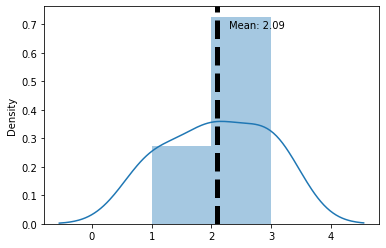

In [9]:
# Now we plot the distribution
plot_distribution(graph1)

## 3. Statistical Hypothesis Testing for the probability of working in Downtown - (PART I)

$H_{0}$ = The probability of working in downtown area during any route is greater than 50%.

$H_{a}$ = The probability of working in downtown area during any route is less than or equal to 50%.

$P$ = .5 (P refers to probability in this test).

Therefore we now state the Null Hypothesis ($H_{0}$) and Alternate Hypothesis ($H_{a}$). This is a 1-tailed (sided) hypothesis test.

$H_{0}$ : $P$ > .50

$H_{a}$ : $P$ $\leqslant$ .50

NOTE: If P-Value is less than 5%, then the $H_{0}$ gets rejected, hence we accept $H_{a}$. As a rule of thumb, 5% is chosen because we have a confidence interval of 95%. Another way to test the null hypothesis or $H_{0}$, is throughout the T-Value (or statistic value from 'stats.ttest_1sampResult' value). If T-Value or $T$ > $T_{c}$ or T-Critical (from the T-Table) then we can reject $H_0$.

...

## One-Sample 1-Tailed T-Test (PART II)

In [10]:
# We set convert one column to an array
# We compile data that gets get plotted (graph2)
downtownProbability = np.array(data['NON-DWTN_EMPIRICAL_PROBABILITY'])
downtownProbability = list(downtownProbability)
graph2 = np.array(data['NON-DWTN_EMPIRICAL_PROBABILITY'])
print(downtownProbability)

[1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


In [11]:
# We check skew and kurtosis
print('Skew:', stats.skew(totalNeighborhood_count))
print('Kurtosis:', stats.kurtosis(totalNeighborhood_count))

Skew: -0.16300591617118826
Kurtosis: -1.3912742382271468


In [12]:
# Now we run the defined testing function where the inputs are an array & our null hypothesis
# Since the odds of working in downtown are low, we should expect our hypothesis to get rejected 
one_sample_one_tailed(downtownProbability,0.5)

T-Value:  10.000000000000002
P-Value:  1.589553175596407e-06
Reject Null Hypothesis for greater-than test


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

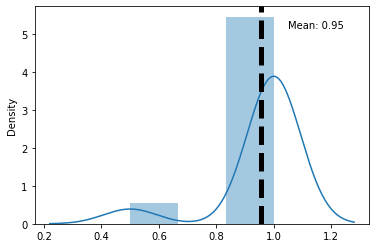

In [13]:
# Now we plot the distribution
# Since the probability of NOT working on downtown is much higher, we expect a skewed graph
plot_distribution(graph2)

## 4. Conclusion

In [ ]:
# The first test (2-tailed for one sample) successfully accepts our null hypothesis stating that there’s 2 
# neighborhoods on average on any route.

In [ ]:
# Unlike the previous test, we reject our null hypothesis stating that there’s a chance greater than 50% of making 
# deliveries in downtown. This confirms the fact that working in this area is statistically not likely; meaning that 
# we accept the alternative hypothesis.